# Read the TEMP data

In [10]:
import xarray as xr

path='D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/cesmi6gat31rblc210_ANN_210912_998911_cam2_decclimots.nc'

ds=xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:          (lev: 26, ilev: 27, time: 788, lat: 48, lon: 96, nbnd: 2)
Coordinates:
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2114-12-16 00:00:00 ... 9984-12-16 00:00:00
  * lat              (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon              (lon) float64 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Dimensions without coordinates: nbnd
Data variables: (12/142)
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    P0               float64 ...
    date             (time) int32 ...
    ...               ...
    VD01             (time, lev, lat, lon) float32 ...
    VQ               (time, lev, lat, lon) float32 ...
    VT               (time, lev, lat, lon) float32 ...
    VU               (time, lev, lat, lon) float32 ...
    VV               (time, lev, lat, lon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
Attributes: (12/17)
    Conventions:      CF-1.0
    source:           CAM
    case:             cesmi6gat31rblc210
    title:            UNSET
    logname:          guido
    host:             c16-10.local
    ...               ...
    climo_script:     ncclimo
    climo_command:    '/groups/ocean/software/software/nco/4.8.0/bin/ncclimo ...
    climo_hostname:   fend03.cluster
    climo_version:    4.8.0
    yrs_averaged:     2110-2119
    NCO:              netCDF Operators version 4.8.0 (Homepage = http://nco.s...

# Extract TEMP

In [12]:
import xarray as xr

# Extracting the 'TREFHT' variable into a new DataArray
ds = ds['TREFHT']

# Creating a new dataset with just the 'TREFHT' variable
ds = ds.to_dataset()
ds


<xarray.Dataset>
Dimensions:  (time: 788, lat: 48, lon: 96)
Coordinates:
  * time     (time) object 2114-12-16 00:00:00 ... 9984-12-16 00:00:00
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    TREFHT   (time, lat, lon) float32 ...

In [13]:
# save the ds
ds.to_netcdf('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP.nc')


# Load processed data

In [3]:
# load the ds
import xarray as xr

ds = xr.open_dataset('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 788, lat: 48, lon: 96)
Coordinates:
  * time     (time) object 2114-12-16 00:00:00 ... 9984-12-16 00:00:00
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    TREFHT   (time, lat, lon) float32 ...

# Plot data and check

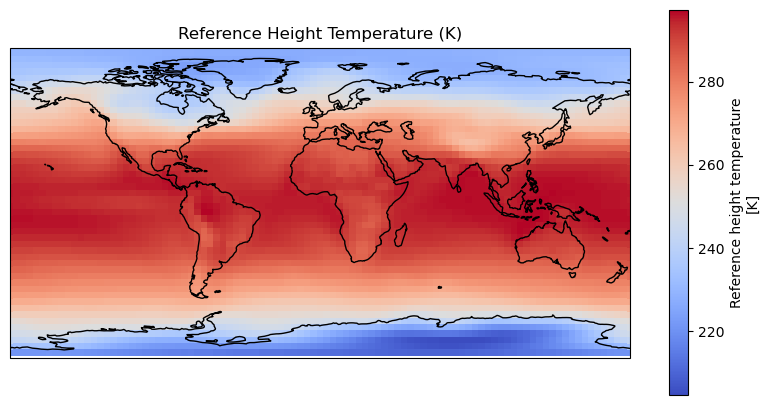

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



# Plotting the first value of time for TREFHT on a real world map
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ds.TREFHT.isel(time=0).plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)
ax.coastlines()
ax.set_global()
plt.title('Reference Height Temperature (K)')
plt.show()
